In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [159]:
data=pd.read_csv('haberman.csv')

In [160]:
print(data.shape)

(305, 4)


In [161]:
print(data.columns)

Index(['30', '64', '1', '1.1'], dtype='object')


In [162]:
data.head

<bound method NDFrame.head of      30  64   1  1.1
0    30  62   3    1
1    30  65   0    1
2    31  59   2    1
3    31  65   4    1
4    33  58  10    1
..   ..  ..  ..  ...
300  75  62   1    1
301  76  67   0    1
302  77  65   3    1
303  78  65   1    2
304  83  58   2    2

[305 rows x 4 columns]>

In [163]:
col_names=['age','Op_Year','axil_nodes','Surv_status']

In [164]:
data=pd.read_csv('haberman.csv',names=col_names,sep=',')

In [165]:
print(data)

     age  Op_Year  axil_nodes  Surv_status
0     30       64           1            1
1     30       62           3            1
2     30       65           0            1
3     31       59           2            1
4     31       65           4            1
..   ...      ...         ...          ...
301   75       62           1            1
302   76       67           0            1
303   77       65           3            1
304   78       65           1            2
305   83       58           2            2

[306 rows x 4 columns]


In [166]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age            306 non-null int64
Op_Year        306 non-null int64
axil_nodes     306 non-null int64
Surv_status    306 non-null int64
dtypes: int64(4)
memory usage: 9.7 KB
None


In [167]:
data['Surv_status'].value_counts()

1    225
2     81
Name: Surv_status, dtype: int64

In [168]:
data['Surv_status'] = data['Surv_status'].map({1:"yes", 2:"no"})
data['Surv_status'] = data['Surv_status'].astype('category')
print(data)

     age  Op_Year  axil_nodes Surv_status
0     30       64           1         yes
1     30       62           3         yes
2     30       65           0         yes
3     31       59           2         yes
4     31       65           4         yes
..   ...      ...         ...         ...
301   75       62           1         yes
302   76       67           0         yes
303   77       65           3         yes
304   78       65           1          no
305   83       58           2          no

[306 rows x 4 columns]


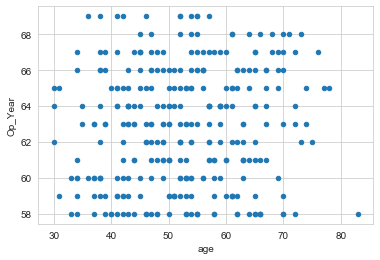

In [169]:
data.plot(kind='scatter',x='age',y='Op_Year');
plt.show()


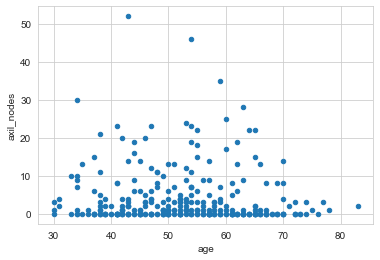

In [170]:
data.plot(kind='scatter',x='age',y='axil_nodes');
plt.show()

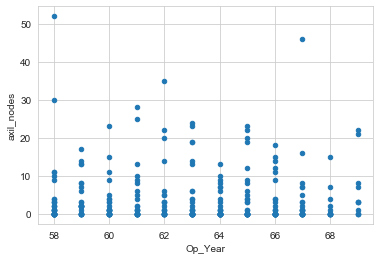

In [171]:
data.plot(kind='scatter',x='Op_Year',y='axil_nodes');
plt.show()

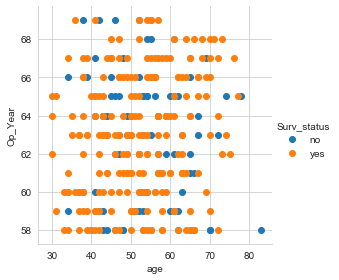

In [173]:
sns.set_style('whitegrid');
sns.FacetGrid(data,hue='Surv_status',height=4)\
    .map(plt.scatter,'age','Op_Year')\
    .add_legend();
plt.show()

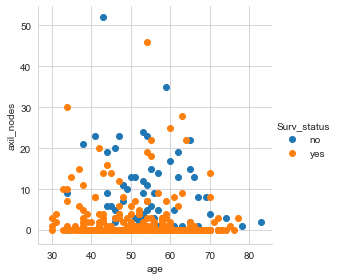

In [174]:
sns.set_style('whitegrid');
sns.FacetGrid(data,hue='Surv_status',size=4)\
    .map(plt.scatter,'age','axil_nodes')\
    .add_legend();
plt.show()

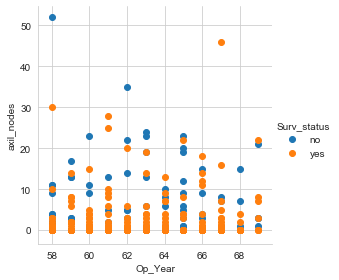

In [175]:
sns.set_style('whitegrid');
sns.FacetGrid(data,hue='Surv_status',size=4)\
    .map(plt.scatter,'Op_Year','axil_nodes')\
    .add_legend();
plt.show()

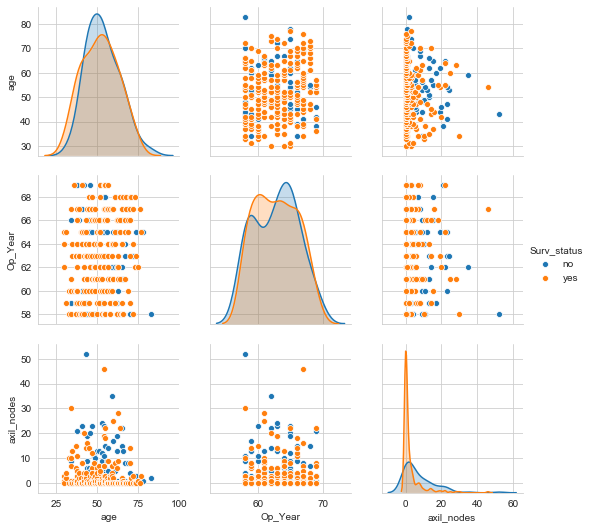

In [176]:
plt.close();
sns.set_style('whitegrid');
sns.pairplot(data,hue='Surv_status',vars=['age','Op_Year','axil_nodes']);
plt.show()

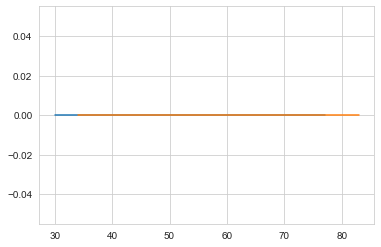

In [184]:
#data.loc[data['Surv_status'== 'yes']]
data_1=data.loc[data['Surv_status']== 'yes'];
data_2=data.loc[data['Surv_status']== 'no'];
#print(data_1)
plt.plot(data_1['age'],np.zeros_like(data_1['age']))
plt.plot(data_2['age'],np.zeros_like(data_2['age']))
plt.show()




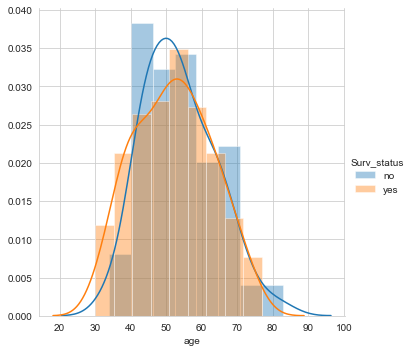

In [185]:
sns.FacetGrid(data, hue="Surv_status", height=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();


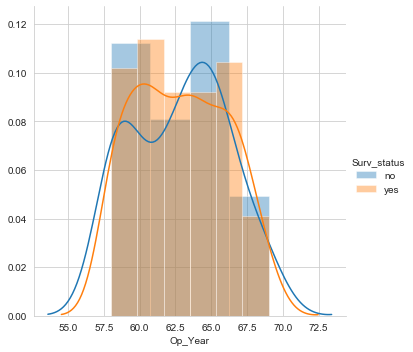

In [186]:
sns.FacetGrid(data, hue="Surv_status", height=5) \
   .map(sns.distplot, "Op_Year") \
   .add_legend();
plt.show();


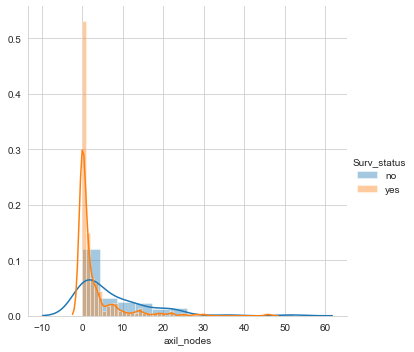

In [187]:
sns.FacetGrid(data, hue="Surv_status", height=5) \
   .map(sns.distplot, "axil_nodes") \
   .add_legend();
plt.show();


[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


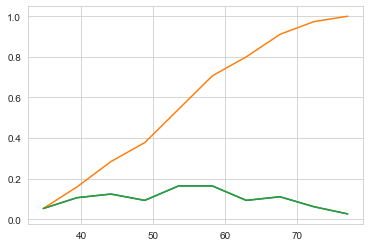

In [188]:
counts,bin_edges=np.histogram(data_1['age'],bins=10,density=True)
pdf=counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:],cdf);
counts, bin_edges = np.histogram(data_1['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

plt.show()

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


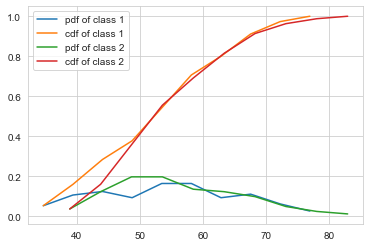

In [189]:
label = ["pdf of class 1", "cdf of class 1", "pdf of class 2", "cdf of class 2"]
counts, bin_edges = np.histogram(data_1['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# Survival_Status 2
counts, bin_edges = np.histogram(data_2['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(label)




plt.show()

In [190]:
print("Means:")
print(np.mean(data_1["age"]))
#Mean with an outlier.
print(np.mean(np.append(data_1["age"],50)));
print(np.mean(data_2["age"]));


print("\nStd-dev:");
print(np.std(data_1["age"]))
print(np.std(data_2["age"]))


Means:
52.01777777777778
52.008849557522126
53.67901234567901

Std-dev:
10.98765547510051
10.10418219303131
